In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings 
warnings.filterwarnings(action='ignore')

In [31]:
raw_data = pd.read_csv('../csv-data/apparel.csv')
raw_data.tail()

,Date,Qty,List_price,Promotion,Cost,price paid,order_no,brand,description,supplier,subfamily,section,size,color
217549,2020-01-25T00:00:00Z,1,100.200000,0.00,25.319,100.200000,AB73124121,Norbert Van der Mierden,item 3274,Nora Petersen,shorts,swimming,Medium,Black
217550,2020-01-25T00:00:00Z,1,119.247619,0.04,31.494,114.477714,AB73125321,Norbert Van der Mierden,item 5052,Nora Petersen,shorts,swimming,14,Black
217551,2020-01-25T00:00:00Z,1,189.723810,0.04,66.724,182.134858,AB73125321,Micheal Korol,item 5262,Angie Myers,Pefumes,outing,Standard,Standard
217552,2020-01-25T00:00:00Z,1,176.390476,0.04,50.084,169.334857,AB73125321,Terri da Rosa,item 5107,Matias Fernandes,Pefumes,outing,Standard,Standard
217553,2020-01-25T00:00:00Z,1,180.200000,0.00,45.469,180.200000,AB75205721,Ramon Wagner,item 5842,یاسمن Drok,jackets,outdoors,Xlarge,Black


In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217554 entries, 0 to 217553
Data columns (total 14 columns):
Date           217554 non-null object
Qty            217554 non-null int64
List_price     217554 non-null float64
Promotion      217554 non-null float64
Cost           217554 non-null float64
price paid     217554 non-null float64
order_no       217554 non-null object
brand          217552 non-null object
description    217552 non-null object
supplier       217517 non-null object
subfamily      217554 non-null object
section        217554 non-null object
size           217554 non-null object
color          217554 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 23.2+ MB


In [33]:
raw_data.describe()

,Qty,List_price,Promotion,Cost,price paid
count,217554.000000,217554.000000,217554.000000,217554.000000,217554.000000
mean,0.983379,231.153471,0.044864,68.776199,213.817032
std,0.279554,181.388719,0.074991,67.739676,186.669785
min,0.000000,0.200000,-0.240741,-4.321000,0.000000
25%,1.000000,130.200000,0.000000,34.159000,122.162667
50%,1.000000,185.200000,0.000000,49.824000,170.676190
75%,1.000000,279.200000,0.070504,78.944000,252.662904
max,70.000000,3500.200000,0.462500,5666.344000,9851.000908


In [34]:
raw_data2= raw_data[['List_price', 'Promotion','Cost','price paid','supplier']]

In [35]:
raw_data['section'].unique()

array(['outdoors', 'swimming', 'cycling', 'outing', 'fitness', 'yoga',
       'ice'], dtype=object)

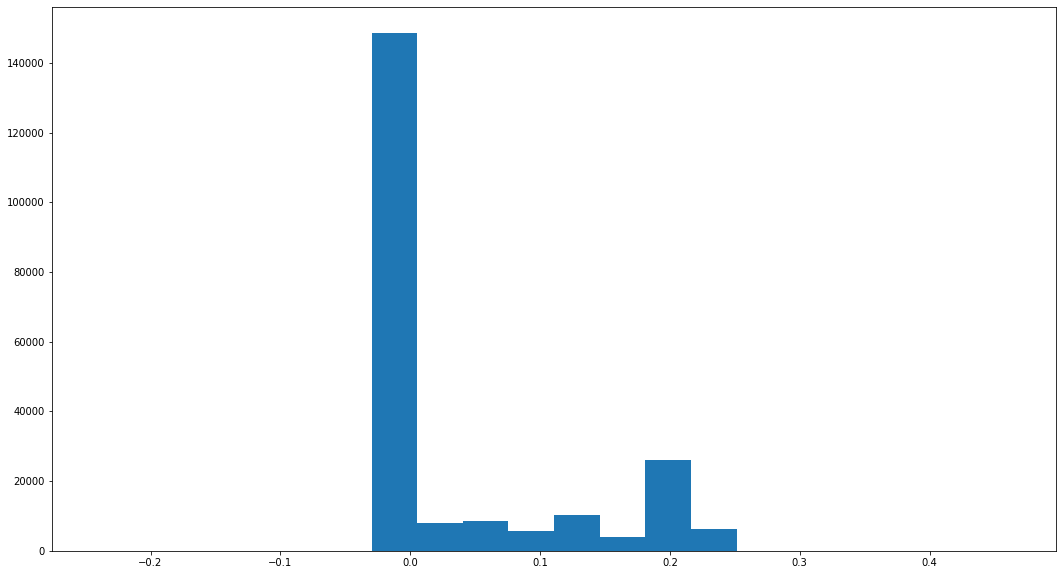

In [36]:
raw_data['Promotion'].hist(bins=20, figsize=(18,10), grid = False)

In [37]:
raw_data2 = raw_data[['List_price','Promotion','price paid']]
raw_data2

,List_price,Promotion,price paid
0,1315.200000,0.1875,1068.600000
1,95.200000,0.1875,77.350000
2,150.200000,0.1875,122.037500
3,710.200000,0.1875,577.037500
4,95.200000,0.0625,89.250000
...,...,...,...
217549,100.200000,0.0000,100.200000
217550,119.247619,0.0400,114.477714
217551,189.723810,0.0400,182.134858
217552,176.390476,0.0400,169.334857


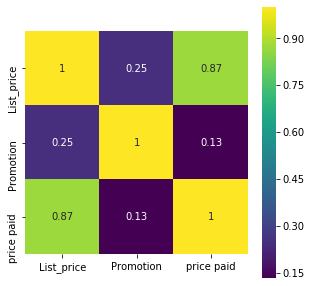

In [38]:
plt.figure(figsize=(5,5))
heat_img = sns.heatmap(raw_data2.corr(), square=True,annot=True, cmap = plt.cm.viridis, linecolor = 'white')
heat_img.set_ylim(3,0)
heat_img.get_ylim()
plt.show()


In [39]:
exam =raw_data[['List_price', 'Promotion','Cost','price paid']]
exam.head()

,List_price,Promotion,Cost,price paid
0,1315.2,0.1875,419.349,1068.6000
1,95.2,0.1875,16.934,77.3500
2,150.2,0.1875,31.299,122.0375
3,710.2,0.1875,223.114,577.0375
4,95.2,0.0625,21.419,89.2500


In [40]:
target=raw_data['subfamily']
target[:2]

0    jackets
1    jackets
Name: subfamily, dtype: object

In [41]:
raw_data['subfamily'].unique()

array(['jackets', 'shorts', 'Pefumes', 'underwear', 'tops', 'pants',
       'skirts', 'shirts'], dtype=object)

In [42]:
from sklearn.model_selection import train_test_split 
#훈련 문제, 연습 문제, 훈련 답, 검증 답 
#X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target = train_test_split(exam, #문제 
                                                                    target, #답
                                                                    test_size = 0.3,
                                                                    random_state= 42
                                                                   )

In [43]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152287 entries, 99204 to 121958
Data columns (total 4 columns):
List_price    152287 non-null float64
Promotion     152287 non-null float64
Cost          152287 non-null float64
price paid    152287 non-null float64
dtypes: float64(4)
memory usage: 5.8 MB


In [44]:
train_target.count()

152287

In [45]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65267 entries, 85653 to 160594
Data columns (total 4 columns):
List_price    65267 non-null float64
Promotion     65267 non-null float64
Cost          65267 non-null float64
price paid    65267 non-null float64
dtypes: float64(4)
memory usage: 2.5 MB


In [46]:
test_target.count()

65267

In [47]:
train_exam.head()

,List_price,Promotion,Cost,price paid
99204,89.200000,0.000,18.819,89.200
48005,145.200000,0.000,35.199,145.200
173608,151.628571,0.125,33.444,132.675
55364,160.200000,0.000,45.079,160.200
14550,945.200000,0.125,299.944,827.050


In [48]:
train_exam.reset_index(inplace=True)

In [49]:
train_exam.head()

,index,List_price,Promotion,Cost,price paid
0,99204,89.200000,0.000,18.819,89.200
1,48005,145.200000,0.000,35.199,145.200
2,173608,151.628571,0.125,33.444,132.675
3,55364,160.200000,0.000,45.079,160.200
4,14550,945.200000,0.125,299.944,827.050


In [50]:
del train_exam['index']

In [51]:
train_exam.head()

,List_price,Promotion,Cost,price paid
0,89.200000,0.000,18.819,89.200
1,145.200000,0.000,35.199,145.200
2,151.628571,0.125,33.444,132.675
3,160.200000,0.000,45.079,160.200
4,945.200000,0.125,299.944,827.050


In [52]:
test_exam.head()

,List_price,Promotion,Cost,price paid
85653,50.200000,0.000000,96.364,50.200000
217005,142.104762,0.041459,38.904,136.213188
166549,100.200000,0.000000,25.319,100.200000
216796,123.057143,0.000000,40.724,123.057143
197450,427.819048,0.000000,159.544,427.819048


In [53]:
test_exam.reset_index(inplace=True)

In [54]:
test_exam.head()

,index,List_price,Promotion,Cost,price paid
0,85653,50.200000,0.000000,96.364,50.200000
1,217005,142.104762,0.041459,38.904,136.213188
2,166549,100.200000,0.000000,25.319,100.200000
3,216796,123.057143,0.000000,40.724,123.057143
4,197450,427.819048,0.000000,159.544,427.819048


In [55]:
del test_exam['index']

In [56]:
test_exam.head()

,List_price,Promotion,Cost,price paid
0,50.200000,0.000000,96.364,50.200000
1,142.104762,0.041459,38.904,136.213188
2,100.200000,0.000000,25.319,100.200000
3,123.057143,0.000000,40.724,123.057143
4,427.819048,0.000000,159.544,427.819048


In [57]:
train_target = train_target.reset_index()
train_target[:5]

,index,subfamily
0,99204,Pefumes
1,48005,Pefumes
2,173608,jackets
3,55364,Pefumes
4,14550,jackets


In [58]:
#del train_target['level_0']

In [59]:
del train_target['index']

In [60]:
train_target.head()

,subfamily
0,Pefumes
1,Pefumes
2,jackets
3,Pefumes
4,jackets


In [61]:
test_target[:5]

85653     Pefumes
217005    Pefumes
166549     shorts
216796     shirts
197450     shorts
Name: subfamily, dtype: object

In [62]:
test_target = test_target.reset_index()
test_target[:5]

,index,subfamily
0,85653,Pefumes
1,217005,Pefumes
2,166549,shorts
3,216796,shirts
4,197450,shorts


In [63]:
del test_target['index']

In [64]:
test_target.head()

,subfamily
0,Pefumes
1,Pefumes
2,shorts
3,shirts
4,shorts


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
max_depth_list = []
#train_list_score = [] 
for i in range(18,35,1):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    max_depth_list.append(tree_clf)
max_depth_list 


[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease

In [67]:
tree_clfs_list =[]
for i in range(17):
    tree_clfs= max_depth_list[i].fit(train_exam, train_target)#많이 공부 
    tree_clfs_list.append(tree_clfs)
tree_clfs_list


[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease

In [73]:
train_list_score = [] 
for i in range(17):
    train_list_score.append(tree_clfs_list[i].score(train_exam, train_target)) #많이 공부한 것에 대한 점수 
train_list_score
    

[0.8569411702903071,
 0.8649326600432079,
 0.8697459402312738,
 0.8735808046648762,
 0.8757543322804967,
 0.8776126655591088,
 0.8784925830832573,
 0.8793002685718413,
 0.8796154629088497,
 0.8799569234406088,
 0.8801998857420529,
 0.8804100153000585,
 0.8805019469816859,
 0.8805216466277489,
 0.8805479128224997,
 0.8805479128224997,
 0.8805610459198749]

In [69]:
from sklearn.metrics import accuracy_score

In [79]:
com_target_list = []
for i in range(17):
    com_target = max_depth_list[i].predict(test_exam)
    com_target_list.append(com_target)
com_target_list


[array(['Pefumes', 'tops', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'tops', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'tops', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 'tops', 'shorts', 'Pefumes'],
       dtype=object),
 array(['Pefumes', 'shorts', 'shorts', ..., 't

In [87]:
accuracy_score_list = []
for i in range(17):
    accuracy_score_list.append(accuracy_score(test_target, com_target_list[i]))
accuracy_score_list

[0.839735241393047,
 0.8451744373113518,
 0.847794444359324,
 0.85107328358895,
 0.8527433465610492,
 0.8545819479982227,
 0.8551488501080179,
 0.8553939969663076,
 0.8555165703954525,
 0.8555625354313818,
 0.8557770389323854,
 0.8556851088605267,
 0.8555931787886681,
 0.8556391438245974,
 0.8557923606110286,
 0.8557157522178129,
 0.8557617172537423]

In [72]:
train_exam.columns

Index(['List_price', 'Promotion', 'Cost', 'price paid'], dtype='object')

In [88]:
max_de_list = []
for i in range(18,35,1):
    max_de_list.append(i)
max_de_list

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

In [89]:
train_list_score

[0.8569411702903071,
 0.8649326600432079,
 0.8697459402312738,
 0.8735808046648762,
 0.8757543322804967,
 0.8776126655591088,
 0.8784925830832573,
 0.8793002685718413,
 0.8796154629088497,
 0.8799569234406088,
 0.8801998857420529,
 0.8804100153000585,
 0.8805019469816859,
 0.8805216466277489,
 0.8805479128224997,
 0.8805479128224997,
 0.8805610459198749]

In [90]:
accuracy_score_list

[0.839735241393047,
 0.8451744373113518,
 0.847794444359324,
 0.85107328358895,
 0.8527433465610492,
 0.8545819479982227,
 0.8551488501080179,
 0.8553939969663076,
 0.8555165703954525,
 0.8555625354313818,
 0.8557770389323854,
 0.8556851088605267,
 0.8555931787886681,
 0.8556391438245974,
 0.8557923606110286,
 0.8557157522178129,
 0.8557617172537423]